In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_excel("C:/Users/ACER/data mining/HotelCustomersDataset.xlsx")

In [3]:
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,0,0,1,0,0,0,0,0
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df.shape

(83590, 31)

In [5]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of           ID Nationality   Age  DaysSinceCreation  \
0          1         PRT  51.0                150   
1          2         PRT   NaN               1095   
2          3         DEU  31.0               1095   
3          4         FRA  60.0               1095   
4          5         FRA  51.0               1095   
...      ...         ...   ...                ...   
83585  83586         ITA  54.0                  0   
83586  83587         IRL  47.0                  0   
83587  83588         IRL  53.0                  0   
83588  83589         IRL  85.0                  0   
83589  83590         IRL  13.0                  0   

                                                NameHash  \
0      0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
1      0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
2      0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   
3      0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...   
4      0x9C1DEF02C9BE242842C1C1

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,83590.0,41795.500000,24130.498838,1.0,20898.25,41795.5,62692.750,83590.00
Age,79811.0,45.398028,16.572368,-11.0,34.00,46.0,57.000,122.00
DaysSinceCreation,83590.0,453.640902,313.390291,0.0,177.00,397.0,723.000,1095.00
AverageLeadTime,83590.0,66.196028,87.758990,-1.0,0.00,29.0,103.000,588.00
LodgingRevenue,83590.0,298.802087,372.851892,0.0,59.00,234.0,402.000,21781.00
OtherRevenue,83590.0,67.589132,114.327776,0.0,2.00,38.5,87.675,7730.25
BookingsCanceled,83590.0,0.002022,0.066770,0.0,0.00,0.0,0.000,9.00
BookingsNoShowed,83590.0,0.000634,0.029545,0.0,0.00,0.0,0.000,3.00
BookingsCheckedIn,83590.0,0.794617,0.695778,0.0,1.00,1.0,1.000,66.00
PersonsNights,83590.0,4.649133,4.567673,0.0,1.00,4.0,6.000,116.00


In [8]:
df.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: o

In [9]:
df.isnull().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [10]:
#menghapus miss value
df = df.dropna()

In [11]:
df.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
#Menghapus kolom yang tidak ingin dipakai
df = df.drop(columns=['ID', 'NameHash', 'DocIDHash', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'])
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other
83586,IRL,47.0,0,109,327.1,277.5,0,0,1,6,3,3,3,Travel Agent/Operator,Other
83587,IRL,53.0,0,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other
83588,IRL,85.0,0,109,981.3,9.0,0,0,1,6,3,3,3,Travel Agent/Operator,Other


In [14]:
# Definisikan fungsi untuk mengkategorikan usia
def categorize_age(age):
    if age <= 12:
        return 'Anak-anak'
    elif age <= 19:
        return 'Remaja'
    elif age <= 59:
        return 'Dewasa'
    else:
        return 'Tua'

# Terapkan fungsi ini pada kolom Age
df['AgeCategory'] = df['Age'].apply(categorize_age)

# Tampilkan beberapa baris untuk melihat hasil
df[['Age', 'AgeCategory']]

,Age,AgeCategory
0,51.0,Dewasa
2,31.0,Dewasa
3,60.0,Tua
4,51.0,Dewasa
5,54.0,Dewasa
...,...,...
83585,54.0,Dewasa
83586,47.0,Dewasa
83587,53.0,Dewasa
83588,85.0,Tua


In [15]:
unique_countries = df['Nationality'].unique()
print(unique_countries)

['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'CYP' 'ARG' 'ARM'
 'CHL' 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV'
 'JOR' 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE'
 'AND' 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT'
 'IDN' 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM'
 'BOL' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM' 'ECU' 'SYC' 'QAT' 'PRY' 'BRB'
 'OMN' 'TMP' 'ABW' 'LBN' 'AIA' 'SLV' 'DMA' 'CUB' 'VNM' 'GEO' 'IRQ' 'GAB'
 'PYF' 'LIE' 'SEN' 'BLR' 'ISL' 'DOM' 'GUY' 'LCA' 'ATA' 'NGA' 'RWA' 'CIV'
 'ALB' 'MKD' 'MNE' 'GTM' 'GHA' 'MDV' 'MCO' 'MUS' 'SYR' 'TGO' 'LKA' 'SUR'
 'KEN' 'MRT' 'HKG' 'CAF' 'NCL' 'STP' 'UZB' 'KIR' 'SDN' 'PRI' 'KNA' 'TJK'
 'SLE' 'LAO' 'COM' 'ETH' 'FRO' 'BEN' 'ZWE' 'ASM' 'BWA' 'ERI' 'SPM' 'JEY'
 'GNQ' 'MDG' 'GIN' 'NIC' 'SWZ' 'CYM' 'SOM' 'ATG' 'K

In [16]:

# Kamus yang memetakan negara ke benua
continent_map = {
    # Amerika
    'USA': 'Amerika', 'CAN': 'Amerika', 'MEX': 'Amerika', 'BRA': 'Amerika', 'ARG': 'Amerika',
    'CRI': 'Amerika', 'COL': 'Amerika', 'VEN': 'Amerika', 'PER': 'Amerika', 'CHL': 'Amerika',
    'PAN': 'Amerika', 'PRY': 'Amerika', 'ECU': 'Amerika', 'BOL': 'Amerika', 'URY': 'Amerika',
    'CUB': 'Amerika', 'JAM': 'Amerika', 'DMA': 'Amerika', 'GUY': 'Amerika', 'SLV': 'Amerika',
    'HTI': 'Amerika', 'ATG': 'Amerika', 'AIA': 'Amerika', 'GTM': 'Amerika', 'PRI': 'Amerika',
    'VIR': 'Amerika', 'BRB': 'Amerika', 'ABW': 'Amerika', 'CYM': 'Amerika', 'SPM': 'Amerika',
    'UMI': 'Amerika', 'GUF': 'Amerika', 'ASM': 'Amerika',

    # Eropa
    'PRT': 'Eropa', 'DEU': 'Eropa', 'FRA': 'Eropa', 'IRL': 'Eropa', 'ESP': 'Eropa', 'BEL': 'Eropa',
    'NLD': 'Eropa', 'AUT': 'Eropa', 'ITA': 'Eropa', 'POL': 'Eropa', 'CHE': 'Eropa', 'GBR': 'Eropa',
    'BIH': 'Eropa', 'FIN': 'Eropa', 'HUN': 'Eropa', 'ROU': 'Eropa', 'CZE': 'Eropa', 'SVN': 'Eropa',
    'AND': 'Eropa', 'SVK': 'Eropa', 'LUX': 'Eropa', 'LVA': 'Eropa', 'LTU': 'Eropa', 'EST': 'Eropa',
    'SRB': 'Eropa', 'RUS': 'Eropa', 'GRC': 'Eropa', 'DNK': 'Eropa', 'NOR': 'Eropa', 'SWE': 'Eropa',
    'ISL': 'Eropa', 'CYP': 'Eropa', 'BGR': 'Eropa', 'HRV': 'Eropa', 'MNE': 'Eropa', 'MKD': 'Eropa',
    'ALB': 'Eropa', 'MCO': 'Eropa', 'SMR': 'Eropa', 'LIE': 'Eropa', 'GIB': 'Eropa', 'JEY': 'Eropa',

    # Asia
    'JPN': 'Asia', 'CHN': 'Asia', 'KOR': 'Asia', 'IND': 'Asia', 'IDN': 'Asia', 'TWN': 'Asia',
    'THA': 'Asia', 'SGP': 'Asia', 'MYS': 'Asia', 'ISR': 'Asia', 'PHL': 'Asia', 'IRN': 'Asia',
    'KAZ': 'Asia', 'UZB': 'Asia', 'BGD': 'Asia', 'LKA': 'Asia', 'MMR': 'Asia', 'PAK': 'Asia',
    'SYR': 'Asia', 'TUR': 'Asia', 'IRQ': 'Asia', 'JOR': 'Asia', 'KWT': 'Asia', 'QAT': 'Asia',
    'SAU': 'Asia', 'LBN': 'Asia', 'ARE': 'Asia', 'TJK': 'Asia', 'TMP': 'Asia', 'ARM': 'Asia',
    'AZE': 'Asia', 'LAO': 'Asia', 'VNM': 'Asia', 'KIR': 'Asia', 'YEM': 'Asia', 'KGZ': 'Asia',
    'NPL': 'Asia', 'MRT': 'Asia',

    # Afrika
    'ZAF': 'Afrika', 'MAR': 'Afrika', 'EGY': 'Afrika', 'KEN': 'Afrika', 'NGA': 'Afrika',
    'TUN': 'Afrika', 'MOZ': 'Afrika', 'DZA': 'Afrika', 'MLI': 'Afrika', 'UGA': 'Afrika',
    'GHA': 'Afrika', 'SEN': 'Afrika', 'GAB': 'Afrika', 'TGO': 'Afrika', 'NAM': 'Afrika',
    'COD': 'Afrika', 'BEN': 'Afrika', 'ZWE': 'Afrika', 'CMR': 'Afrika', 'CAF': 'Afrika',
    'GIN': 'Afrika', 'SLE': 'Afrika', 'STP': 'Afrika', 'SDN': 'Afrika', 'ERI': 'Afrika',
    'MDG': 'Afrika', 'COM': 'Afrika', 'GNQ': 'Afrika', 'RWA': 'Afrika', 'MLT': 'Afrika',
    'LBR': 'Afrika', 'GNB': 'Afrika',

    # Australia dan Oceania
    'AUS': 'Australia', 'NZL': 'Australia', 'FJI': 'Australia', 'WSM': 'Australia', 'TON': 'Australia',
    'PYF': 'Australia', 'NCL': 'Australia', 'WLF': 'Australia', 'NRU': 'Australia', 'KIR': 'Australia',
    'TMP': 'Australia',

    # Lainnya atau tidak jelas
    'ATA': 'Antartika', 'ATF': 'Antartika',
}

# Peta yang mengkonversi benua menjadi angka
continent_to_num = {
    'Amerika': 1,
    'Eropa': 2,
    'Asia': 3,
    'Afrika': 4,
    'Australia': 5,
    'Antartika': 6,
    'Lainnya': 7
}

# Fungsi untuk mengelompokkan negara ke benua
def categorize_nationality(nationality):
    return continent_map.get(nationality, 'Lainnya')  # 'Lainnya' jika negara tidak ada dalam map

# Terapkan fungsi ini ke kolom Nationality
df['Continent'] = df['Nationality'].apply(categorize_nationality)

# Ubah benua menjadi angka
df['Continent'] = df['Continent'].map(continent_to_num)

# Tampilkan beberapa baris untuk melihat hasil
print(df[['Nationality', 'Continent']])# Peta yang mengkonversi benua menjadi angka
continent_to_num = {
    'Amerika': 1,
    'Eropa': 2,
    'Asia': 3,
    'Afrika': 4,
    'Australia': 5,
    'Antartika': 6,
    'Lainnya': 7
}

# Fungsi untuk mengelompokkan negara ke benua
def categorize_nationality(nationality):
    return continent_map.get(nationality, 'Lainnya')  # 'Lainnya' jika negara tidak ada dalam map

# Terapkan fungsi ini ke kolom Nationality
df['Continent'] = df['Nationality'].apply(categorize_nationality)

# Ubah benua menjadi angka
df['Continent'] = df['Continent'].map(continent_to_num)

# Tampilkan beberapa baris untuk melihat hasil
print(df[['Nationality', 'Continent']])

# Peta yang mengkonversi benua menjadi angka
continent_to_num = {
    'Amerika': 1,
    'Eropa': 2,
    'Asia': 3,
    'Afrika': 4,
    'Australia': 5,
    'Antartika': 6,
    'Lainnya': 7
}

# Fungsi untuk mengelompokkan negara ke benua
def categorize_nationality(nationality):
    return continent_map.get(nationality, 'Lainnya')  # 'Lainnya' jika negara tidak ada dalam map

# Terapkan fungsi ini ke kolom Nationality
df['Continent'] = df['Nationality'].apply(categorize_nationality)

# Ubah benua menjadi angka
df['Continent'] = df['Continent'].map(continent_to_num)

# Tampilkan beberapa baris untuk melihat hasil
print(df[['Nationality', 'Continent']])

      Nationality  Continent
0             PRT          2
2             DEU          2
3             FRA          2
4             FRA          2
5             JPN          3
...           ...        ...
83585         ITA          2
83586         IRL          2
83587         IRL          2
83588         IRL          2
83589         IRL          2

[79811 rows x 2 columns]
      Nationality  Continent
0             PRT          2
2             DEU          2
3             FRA          2
4             FRA          2
5             JPN          3
...           ...        ...
83585         ITA          2
83586         IRL          2
83587         IRL          2
83588         IRL          2
83589         IRL          2

[79811 rows x 2 columns]
      Nationality  Continent
0             PRT          2
2             DEU          2
3             FRA          2
4             FRA          2
5             JPN          3
...           ...        ...
83585         ITA          2
83586         IRL   

In [17]:
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,AgeCategory,Continent
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,Dewasa,2
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,Dewasa,2
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,Tua,2
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,Dewasa,2
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,Dewasa,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,Dewasa,2
83586,IRL,47.0,0,109,327.1,277.5,0,0,1,6,3,3,3,Travel Agent/Operator,Other,Dewasa,2
83587,IRL,53.0,0,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,Dewasa,2
83588,IRL,85.0,0,109,981.3,9.0,0,0,1,6,3,3,3,Travel Agent/Operator,Other,Tua,2


In [18]:
# Definisikan fungsi untuk mengkategorikan usia
def categorize_age(age):
    if age <= 12:
        return 'Anak-anak'
    elif age <= 19:
        return 'Remaja'
    elif age <= 59:
        return 'Dewasa'
    else:
        return 'Tua'

# Terapkan fungsi ini pada kolom Age
df['AgeCategory'] = df['Age'].apply(categorize_age)

# Peta kategori ke angka
age_category_mapping = {'Anak-anak': 1, 'Remaja': 2, 'Dewasa': 3, 'Tua': 4}

# Mengonversi AgeCategory (kategori umur) menjadi angka
df['AgeCategory'] = df['AgeCategory'].map(age_category_mapping)

# Tampilkan hasil encoding
print(df[['Age', 'AgeCategory']].head())

    Age  AgeCategory
0  51.0            3
2  31.0            3
3  60.0            4
4  51.0            3
5  54.0            3


In [19]:
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,AgeCategory,Continent
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,3,2
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,3,2
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,4,2
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,3,2
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,3,2
83586,IRL,47.0,0,109,327.1,277.5,0,0,1,6,3,3,3,Travel Agent/Operator,Other,3,2
83587,IRL,53.0,0,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,3,2
83588,IRL,85.0,0,109,981.3,9.0,0,0,1,6,3,3,3,Travel Agent/Operator,Other,4,2


In [20]:
#menghitung jumlah outliers
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
outliers

Age                      29
DaysSinceCreation         0
AverageLeadTime        3178
LodgingRevenue         3723
OtherRevenue           4783
BookingsCanceled         98
BookingsNoShowed         38
BookingsCheckedIn     20420
PersonsNights           966
RoomNights              632
DaysSinceLastStay         0
DaysSinceFirstStay        0
AgeCategory           21258
Continent             13713
dtype: int64

In [21]:
# Kolom yang memiliki outliers, kecuali 'BookingsCheckedIn'
columns_with_outliers = ['Age', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'RoomNights']

# Fungsi untuk mendeteksi dan mengisi outliers dengan median
def fill_outliers_with_median(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Kuartil pertama
        Q3 = df[col].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1  # Rentang antar kuartil
        lower_bound = Q1 - 1.5 * IQR  # Batas bawah
        upper_bound = Q3 + 1.5 * IQR  # Batas atas
        median_value = df[col].median()  # Nilai median
        
        # Mengisi outliers dengan nilai median
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_value
    return df

# Mengisi outliers di kolom yang memiliki outliers dengan median
df = fill_outliers_with_median(df, columns_with_outliers)

In [22]:
# Cek outliers pada seluruh kolom numeric
numeric_df= df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek outliers 
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
print(outliers)

Age                       0
DaysSinceCreation         0
AverageLeadTime        1828
LodgingRevenue         1071
OtherRevenue           2408
BookingsCanceled         98
BookingsNoShowed         38
BookingsCheckedIn     20420
PersonsNights          2856
RoomNights             2248
DaysSinceLastStay         0
DaysSinceFirstStay        0
AgeCategory           21258
Continent             13713
dtype: int64


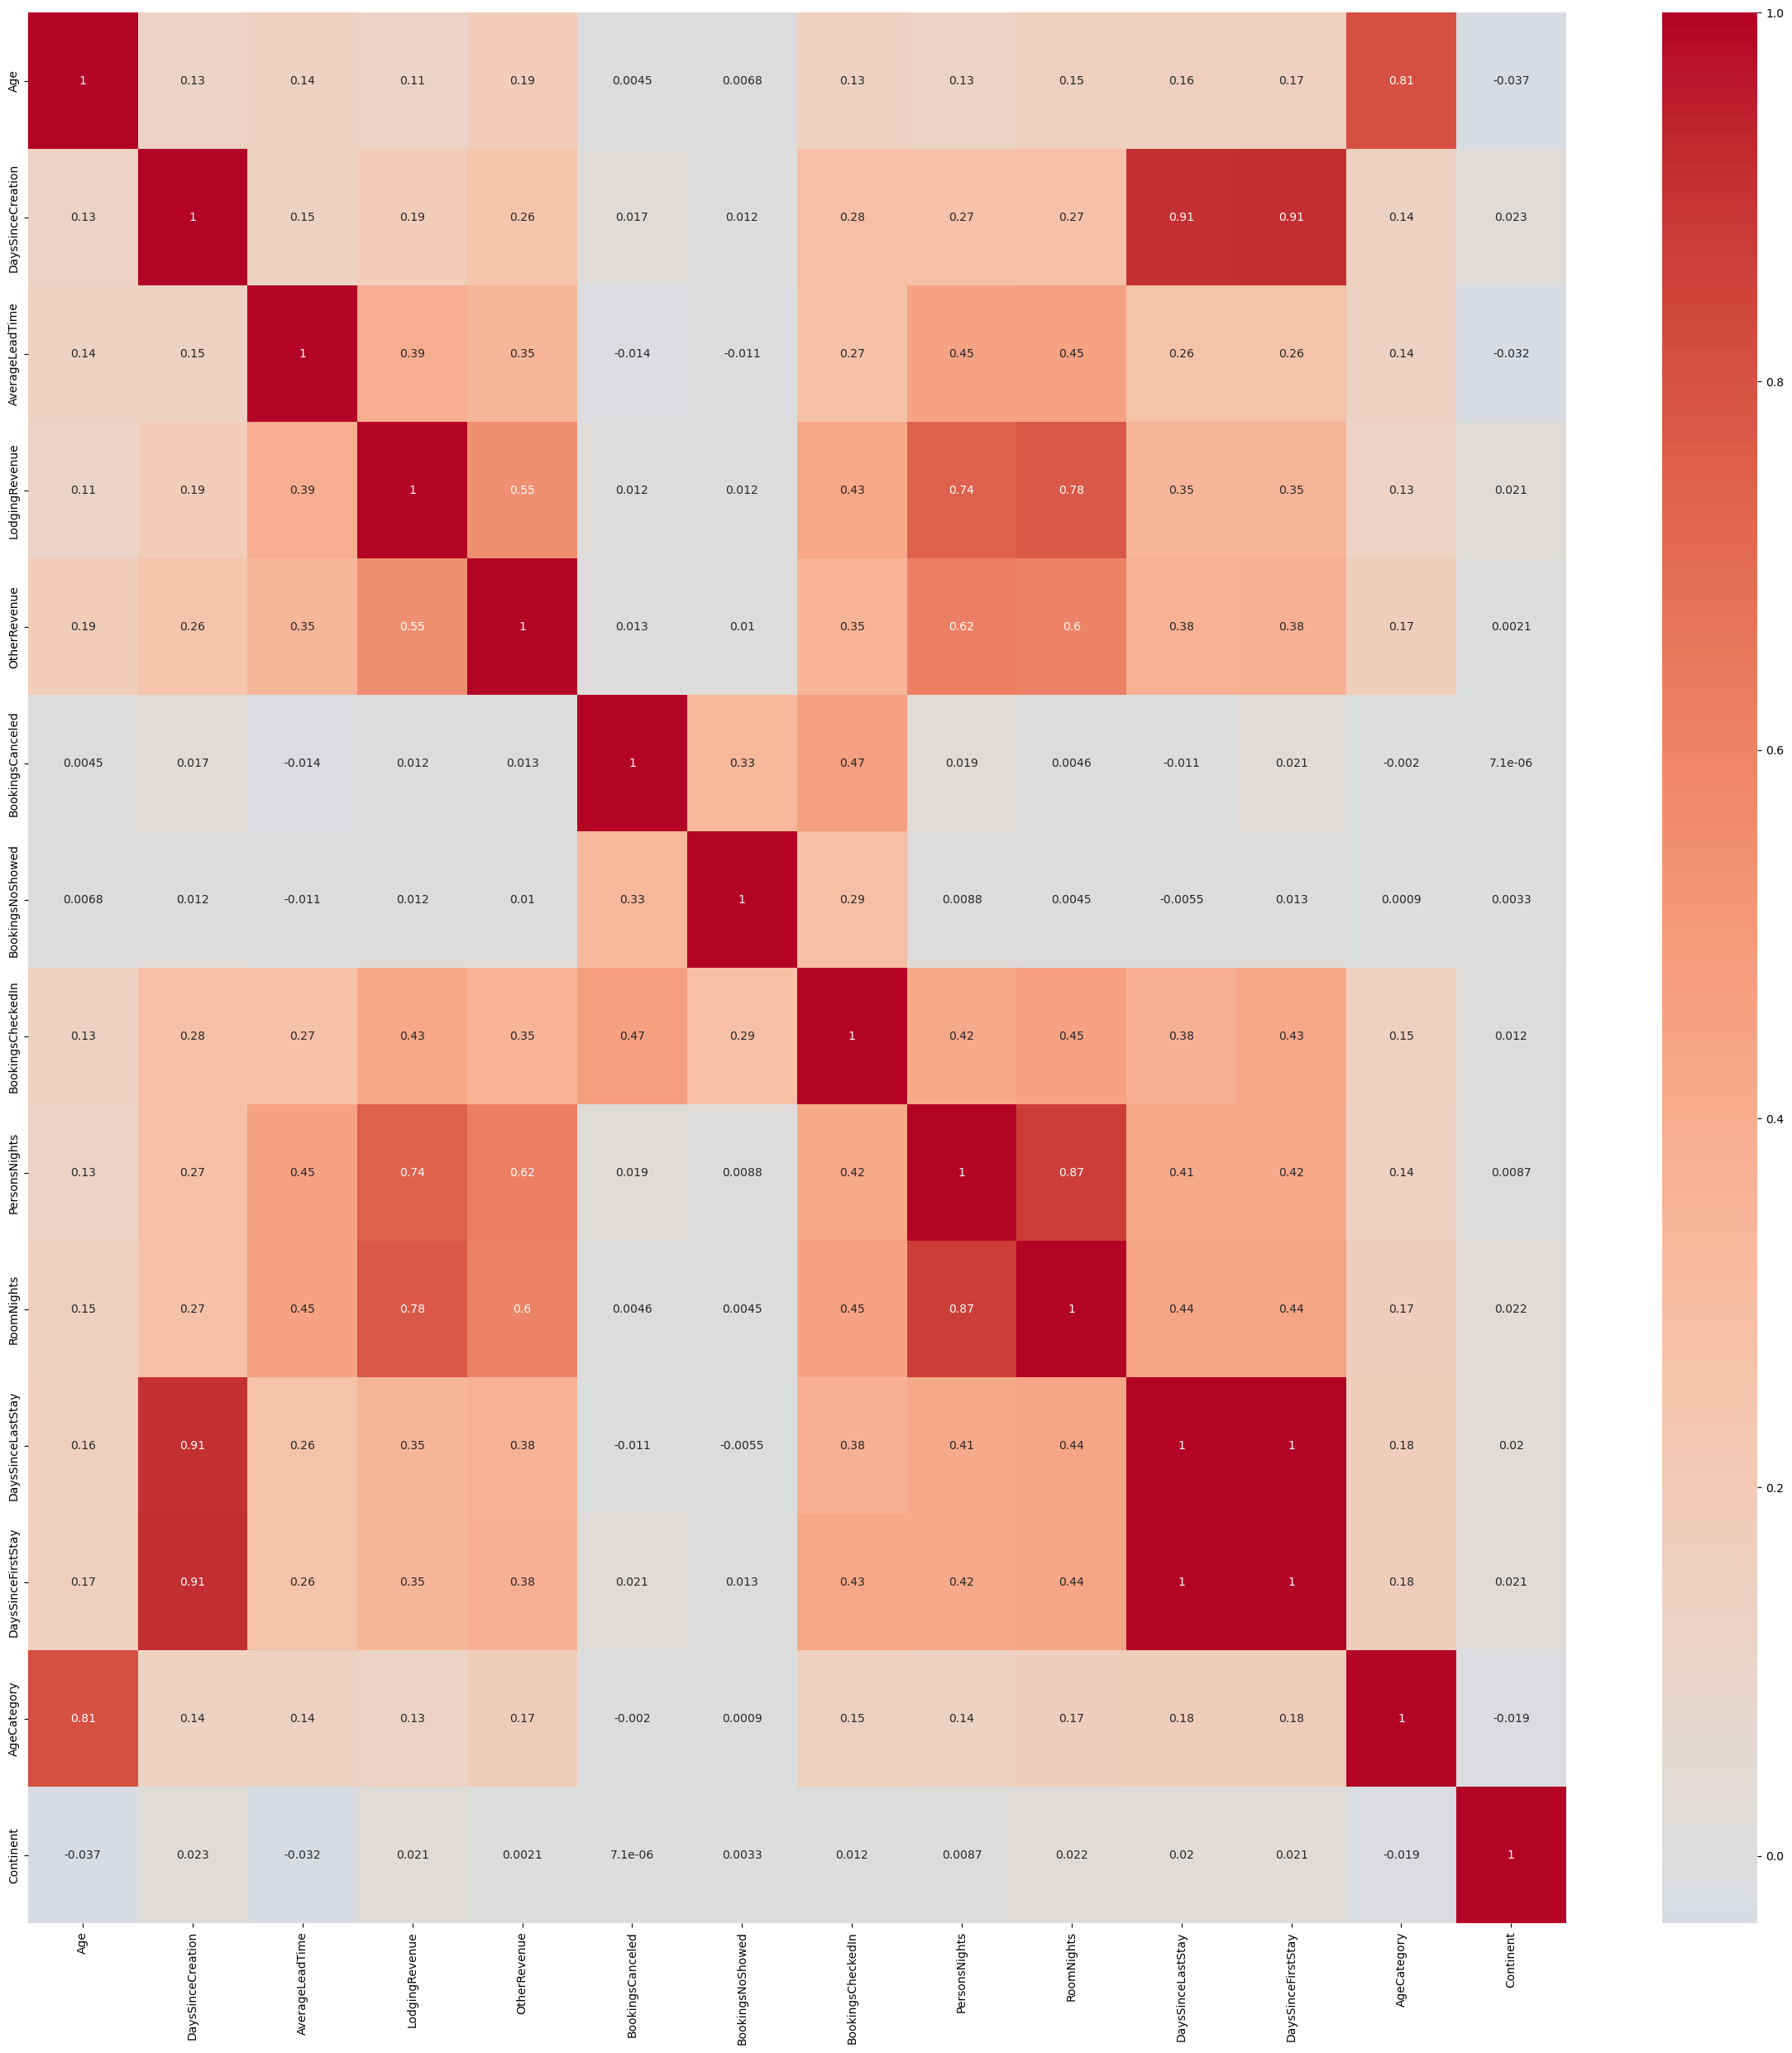

In [23]:
numeric_data = df.select_dtypes(include=['number'])
corrmat = numeric_data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)
plt.show()

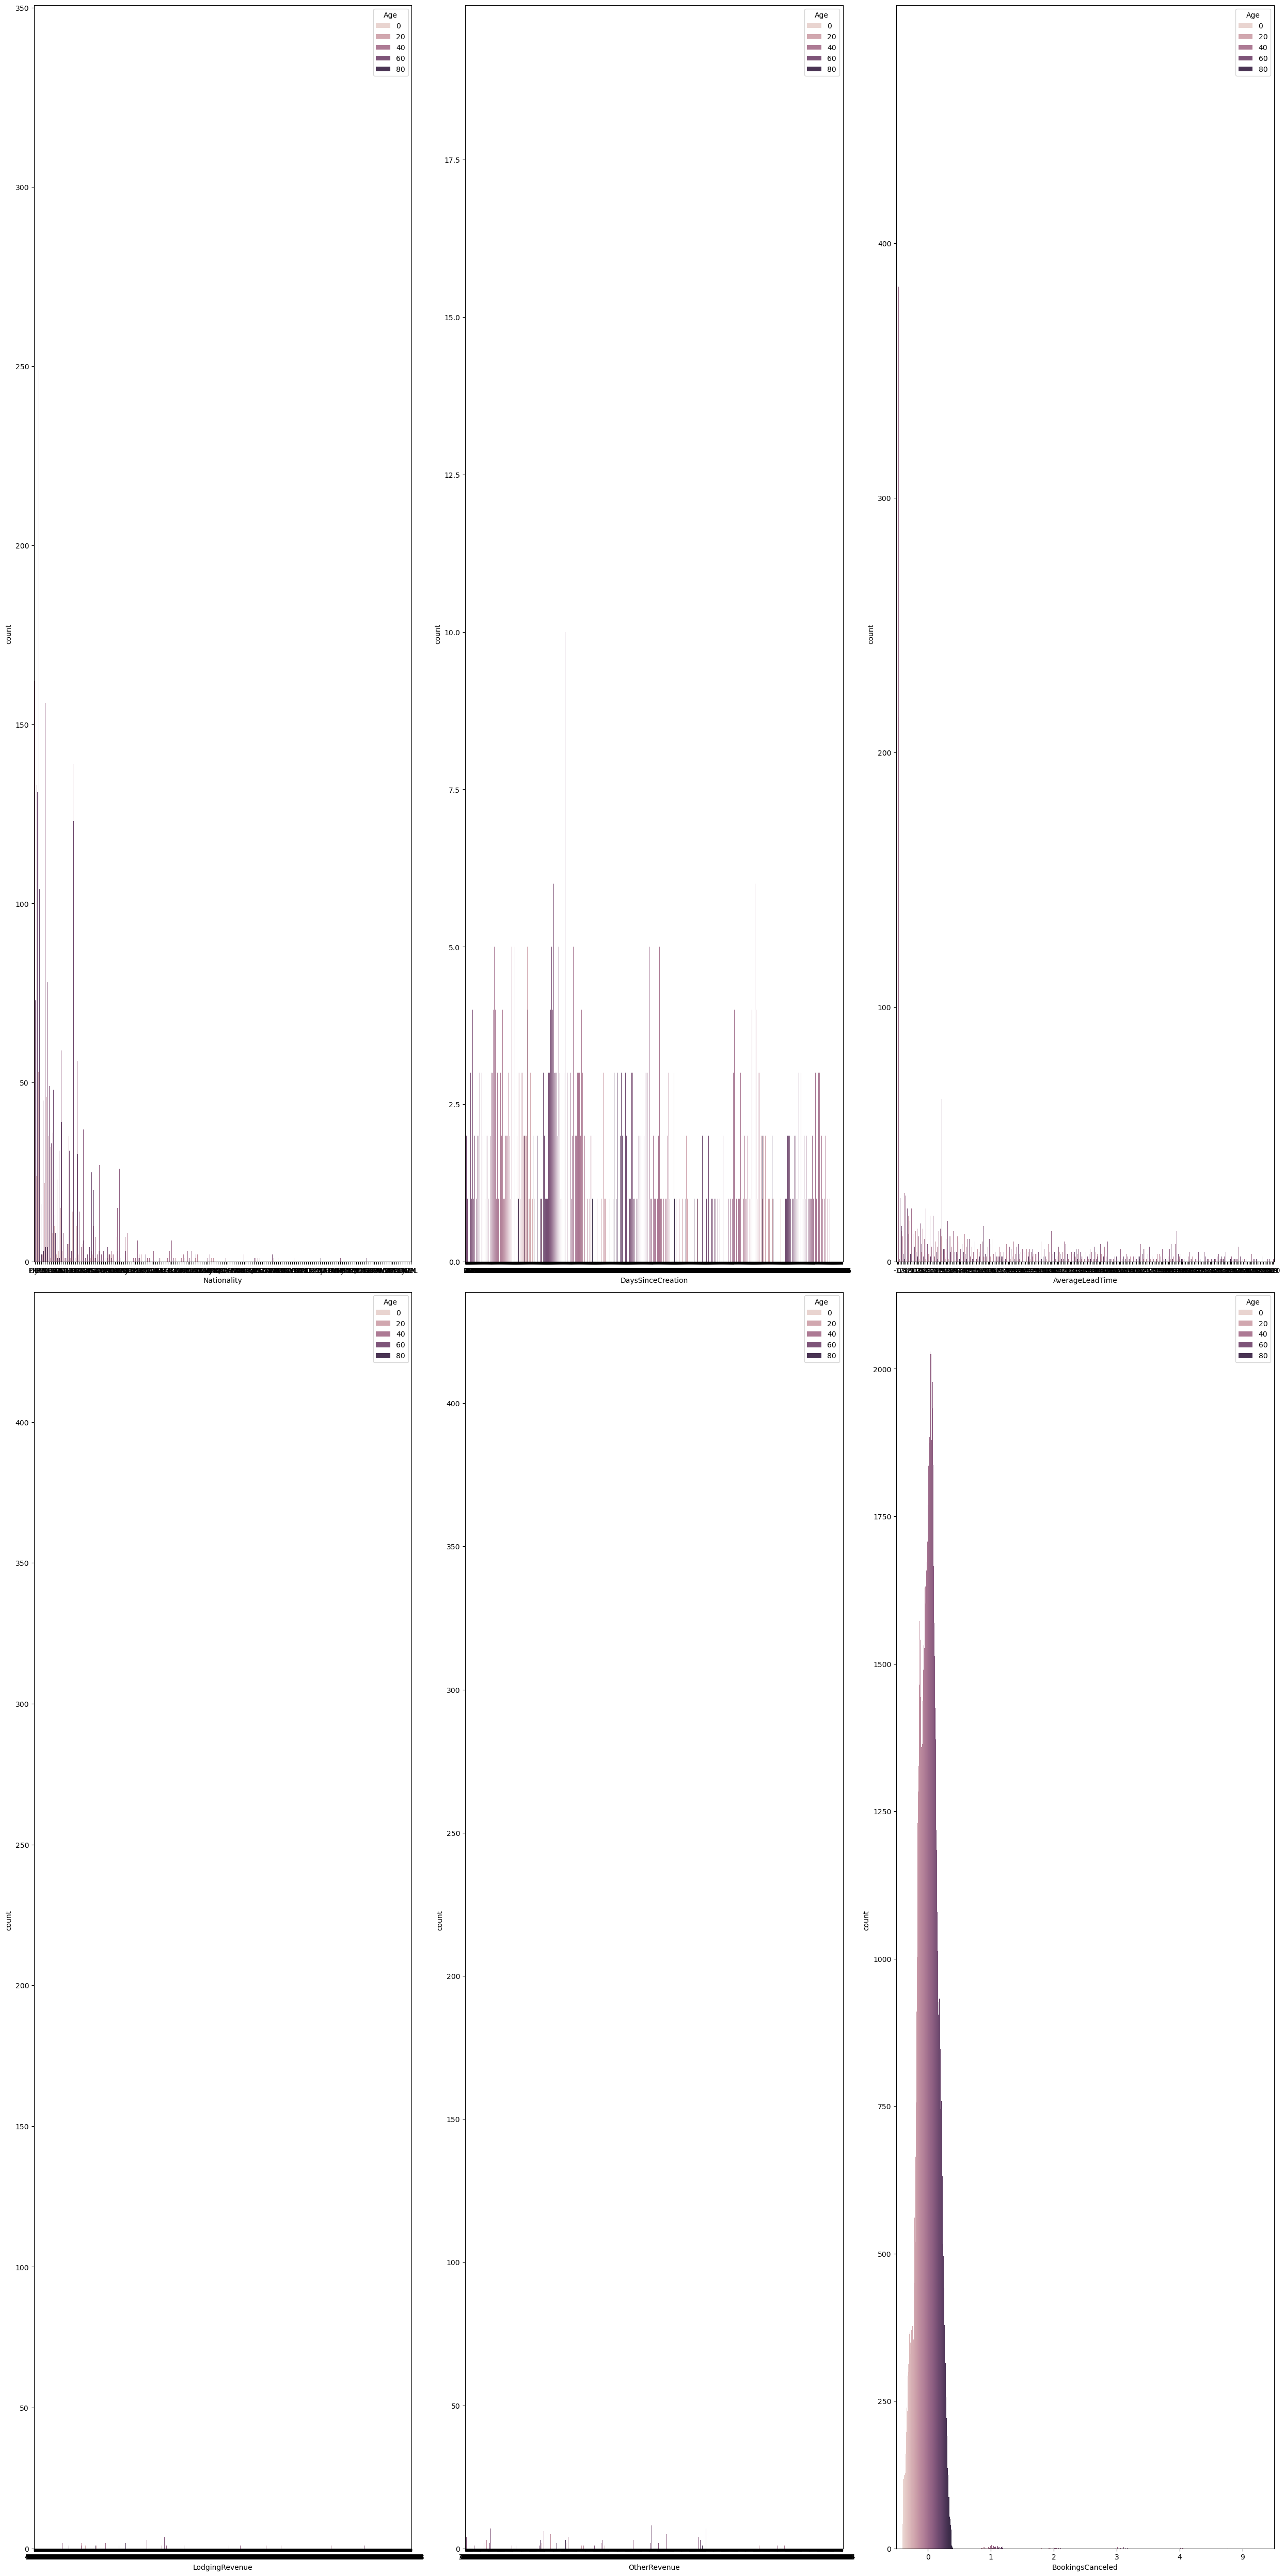

In [24]:
cat_var = ['Nationality', 'DaysSinceCreation', 'AverageLeadTime',
           'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
           'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
           'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
           'MarketSegment']

fig, axes = plt.subplots(2, 3, figsize=(25, 50))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(x=cat, data=df, hue='Age', ax=ax)
plt.tight_layout()
plt.show()

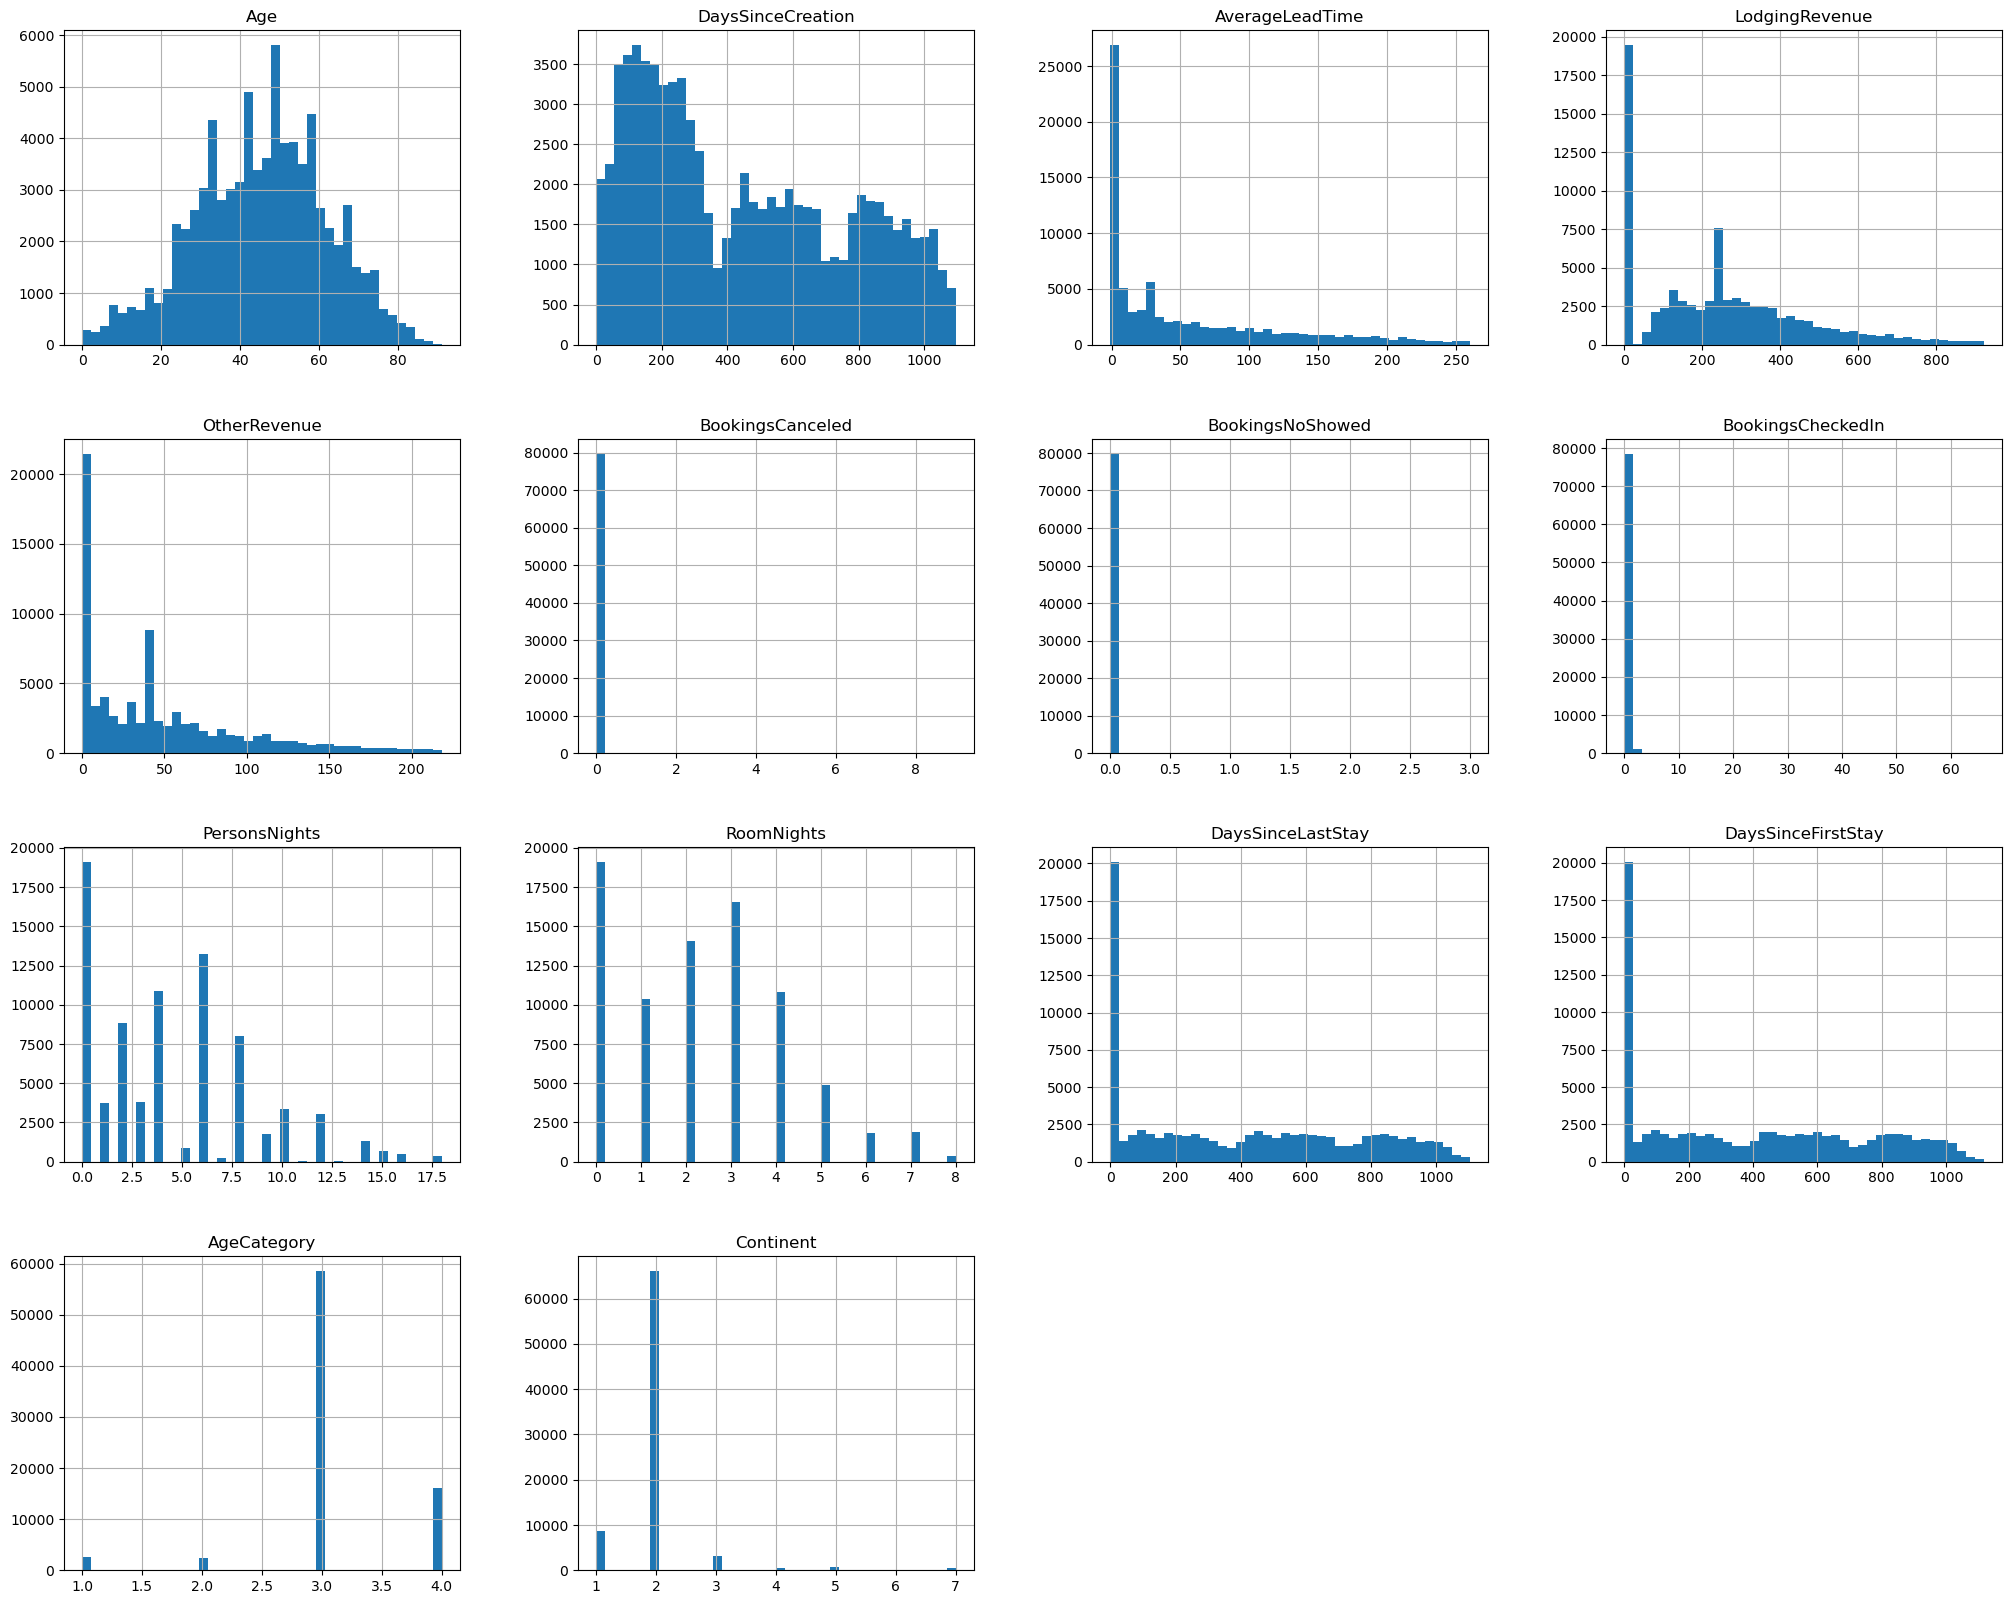

In [25]:
# Histogram
df.hist(bins=40, figsize=(25, 20))
plt.show()

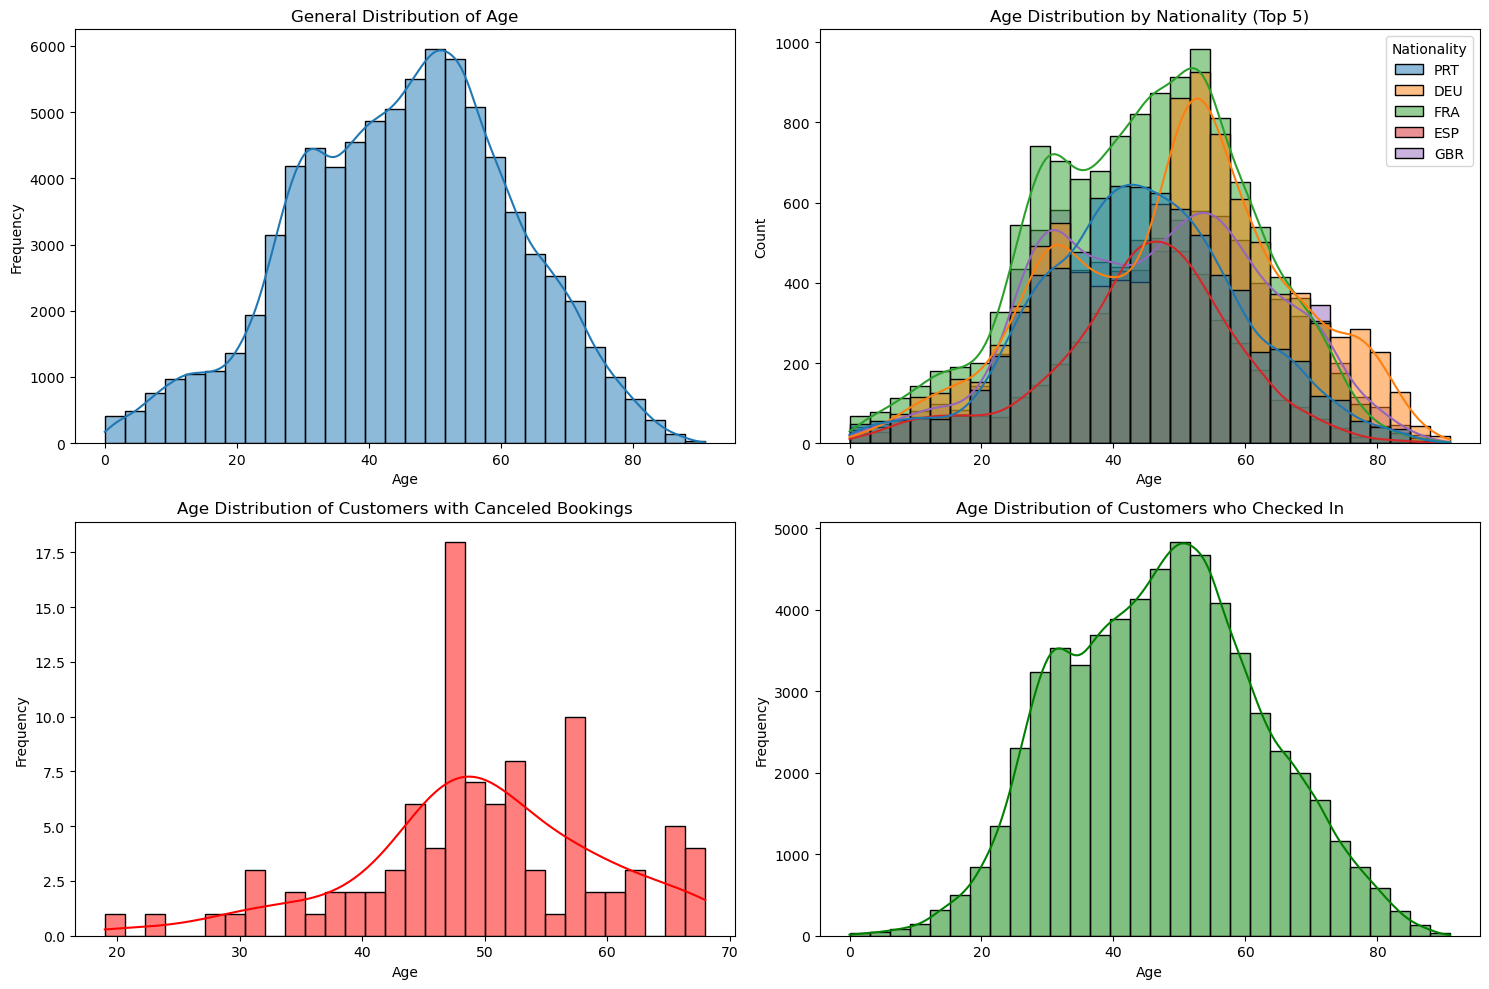

In [26]:
# Set up the figure for multiple displots
plt.figure(figsize=(15, 10))

# 1. General Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('General Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Age distribution by Nationality (Top 5)
top_nationalities = df['Nationality'].value_counts().index[:5]
plt.subplot(2, 2, 2)
sns.histplot(data=df[df['Nationality'].isin(top_nationalities)], x='Age', hue='Nationality', kde=True, bins=30)
plt.title('Age Distribution by Nationality (Top 5)')
plt.xlabel('Age')

# 3. Age distribution for customers with canceled bookings
plt.subplot(2, 2, 3)
sns.histplot(df[df['BookingsCanceled'] > 0]['Age'].dropna(), kde=True, bins=30, color='red')
plt.title('Age Distribution of Customers with Canceled Bookings')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 4. Age distribution for customers who checked in
plt.subplot(2, 2, 4)
sns.histplot(df[df['BookingsCheckedIn'] > 0]['Age'].dropna(), kde=True, bins=30, color='green')
plt.title('Age Distribution of Customers who Checked In')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

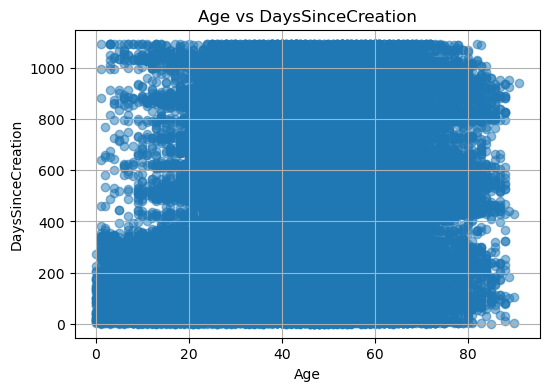

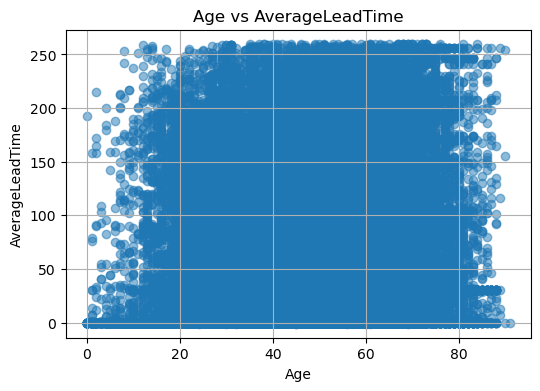

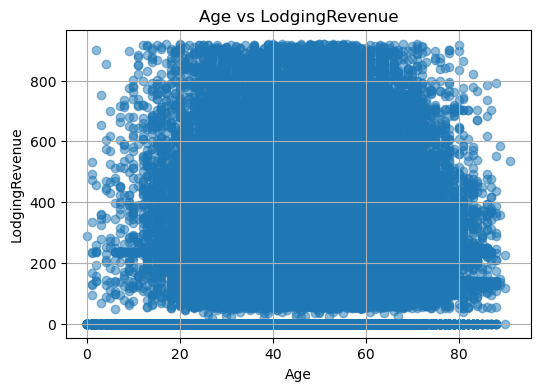

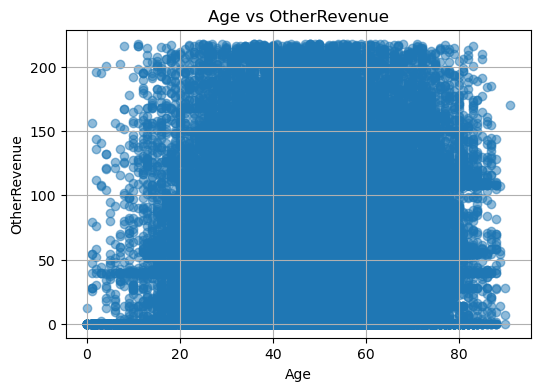

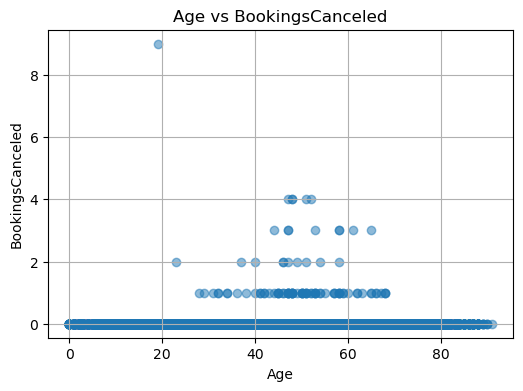

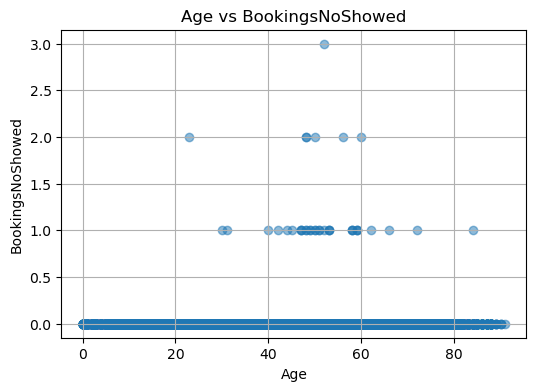

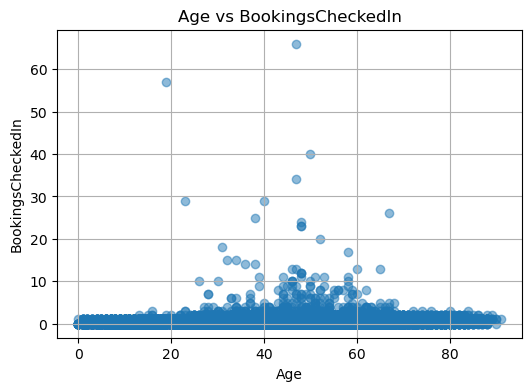

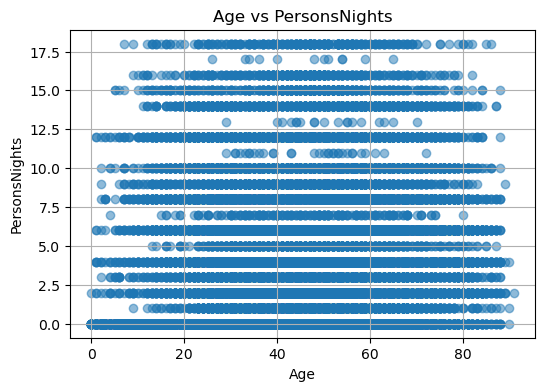

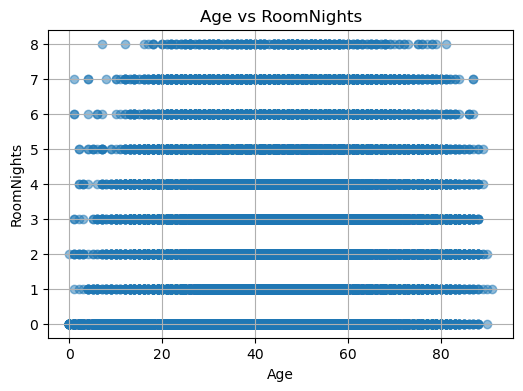

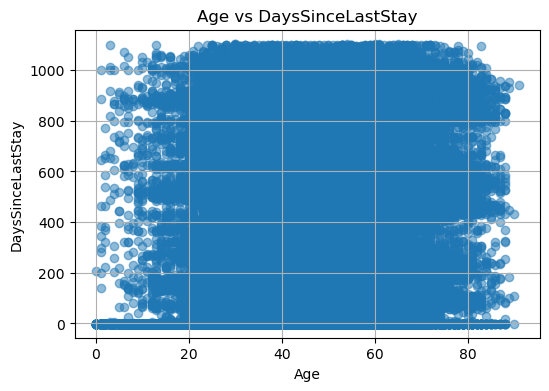

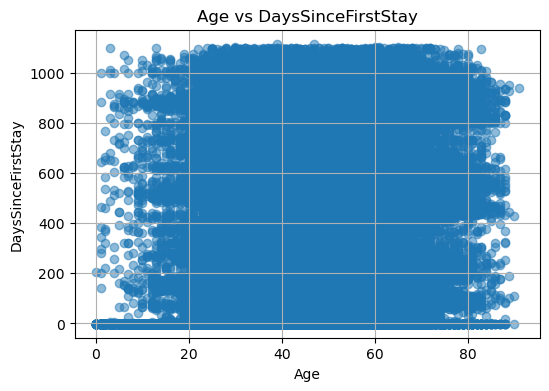

In [27]:
# Menentukan kolom yang akan dibandingkan dengan 'Age'
columns_to_compare = ['DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
                      'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
                      'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
                      'DaysSinceLastStay', 'DaysSinceFirstStay']

# Membuat scatter plot perbandingan antara 'Age' dan kolom lainnya
for column in columns_to_compare:
    plt.figure(figsize=(6, 4))
    plt.scatter(df['Age'], df[column], alpha=0.5)
    plt.title(f'Age vs {column}')
    plt.xlabel('Age')
    plt.ylabel(column)

    plt.grid(True)
    plt.show()

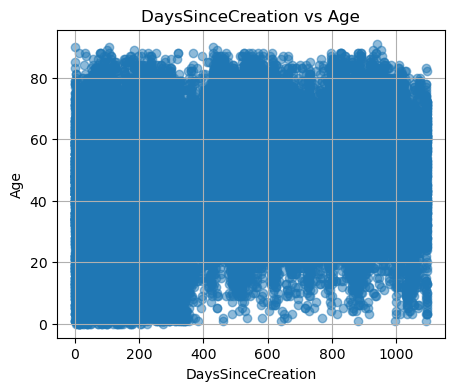

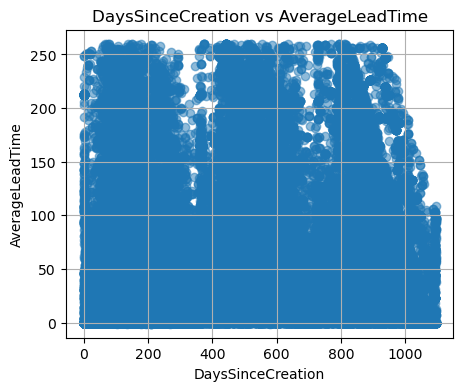

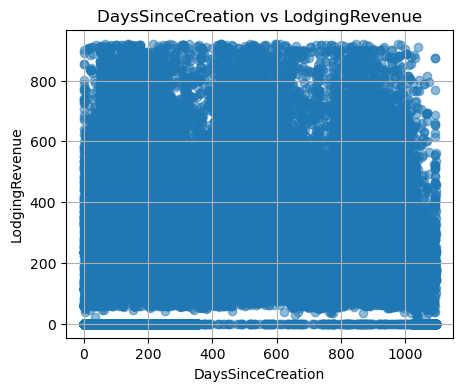

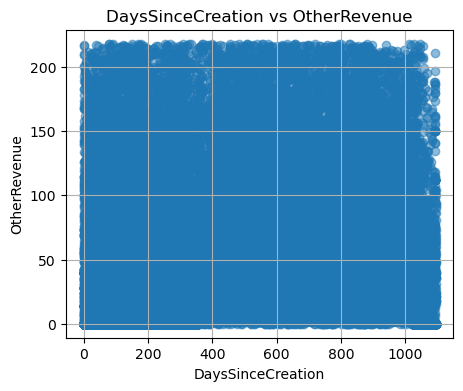

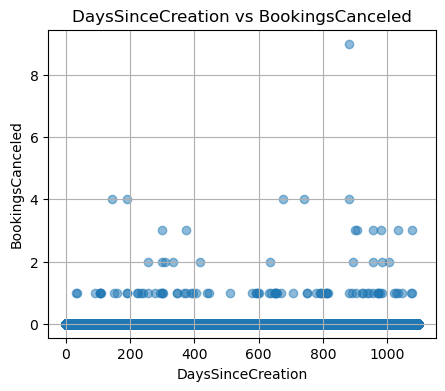

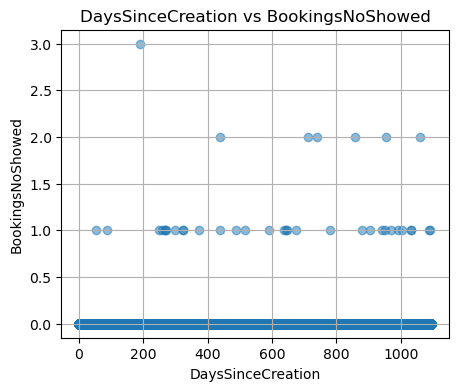

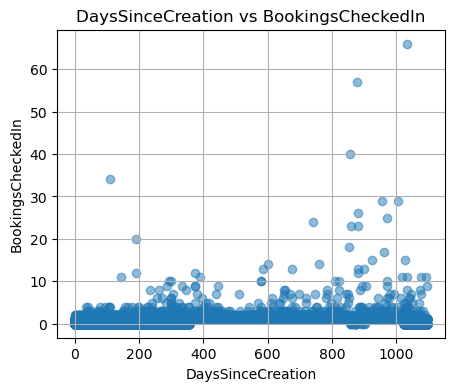

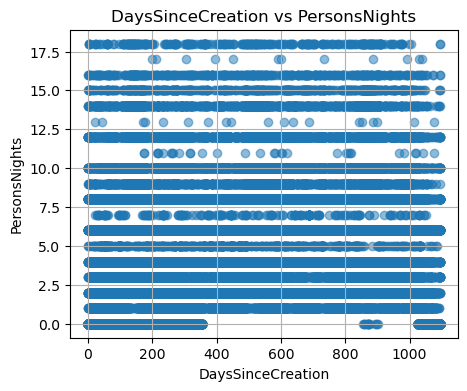

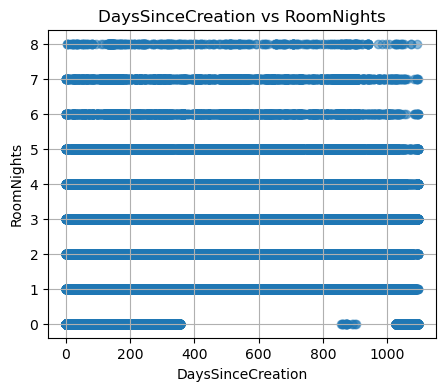

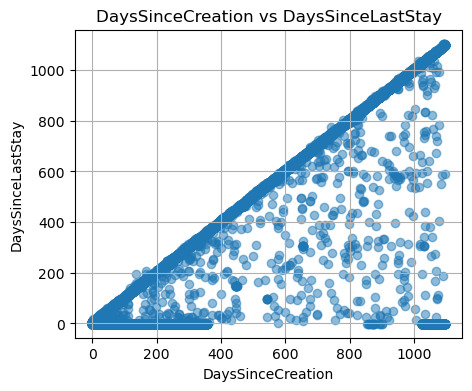

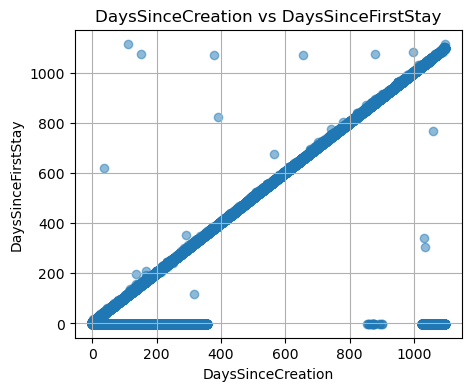

In [28]:

columns_to_compare = ['Age', 'AverageLeadTime', 'LodgingRevenue',
                      'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
                      'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
                      'DaysSinceLastStay', 'DaysSinceFirstStay']


for column in columns_to_compare:
    plt.figure(figsize=(5, 4))
    plt.scatter(df['DaysSinceCreation'], df[column], alpha=0.5)
    plt.title(f'DaysSinceCreation vs {column}')
    plt.xlabel('DaysSinceCreation')
    plt.ylabel(column)

    plt.grid(True)
    plt.show()

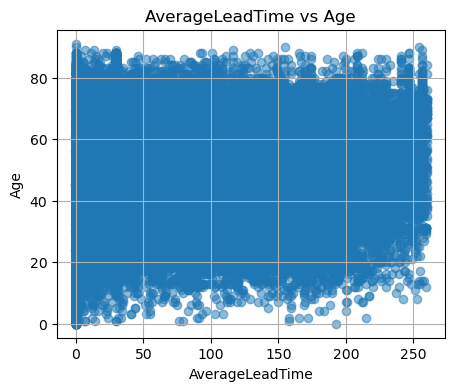

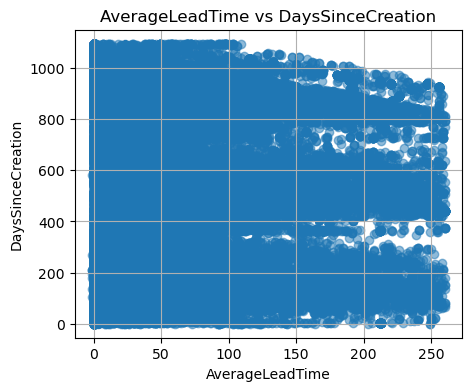

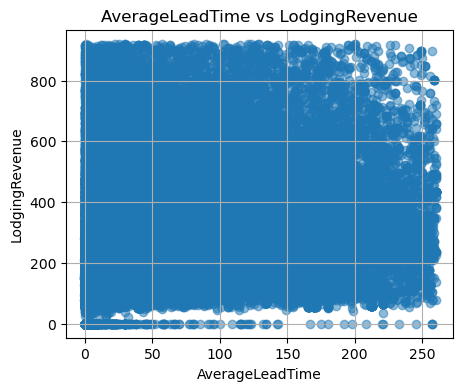

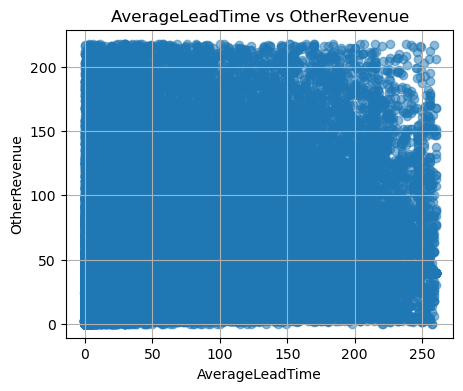

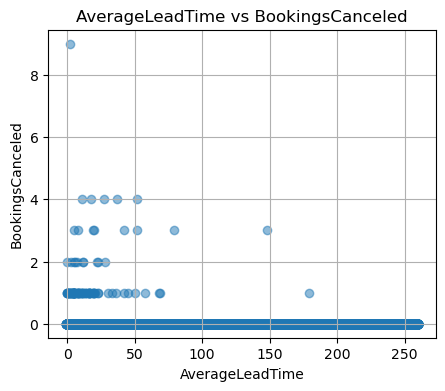

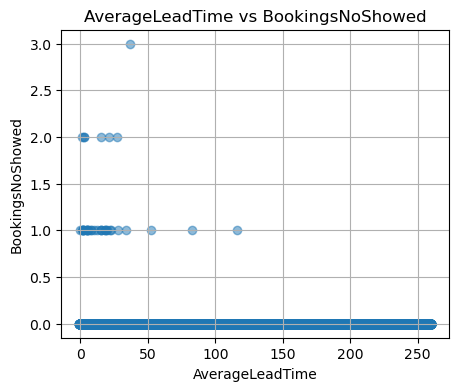

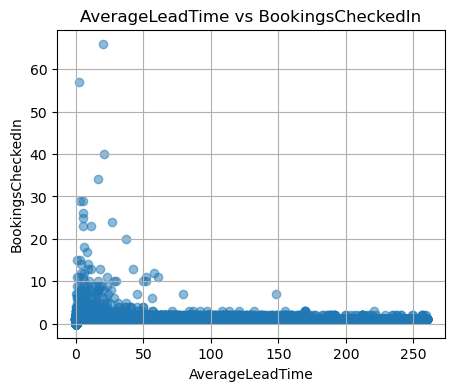

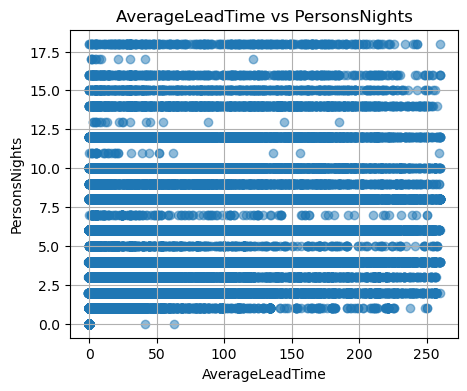

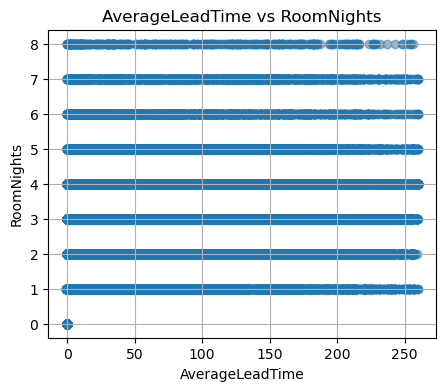

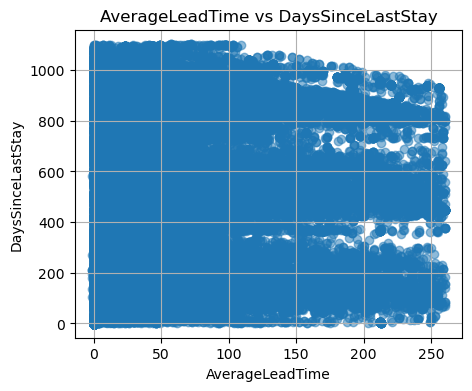

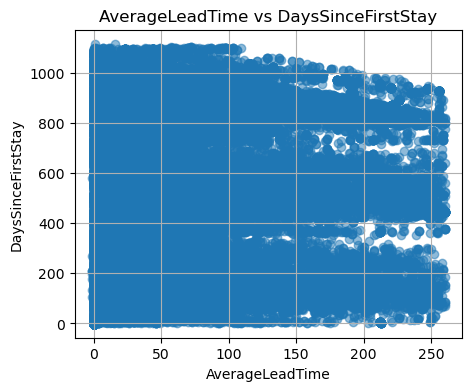

In [29]:
columns_to_compare = ['Age', 'DaysSinceCreation', 'LodgingRevenue',
                      'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
                      'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
                      'DaysSinceLastStay', 'DaysSinceFirstStay']


for column in columns_to_compare:
    plt.figure(figsize=(5, 4))
    plt.scatter(df['AverageLeadTime'], df[column], alpha=0.5)
    plt.title(f'AverageLeadTime vs {column}')
    plt.xlabel('AverageLeadTime')
    plt.ylabel(column)

    plt.grid(True)
    plt.show()

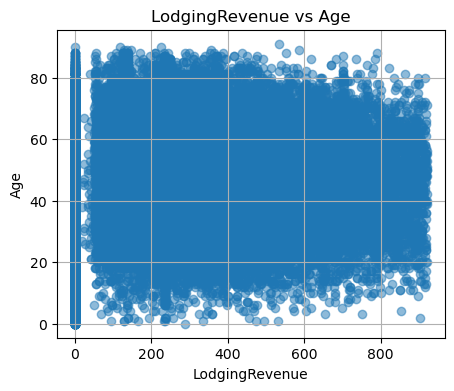

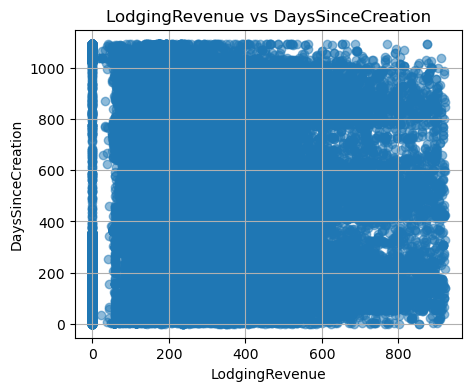

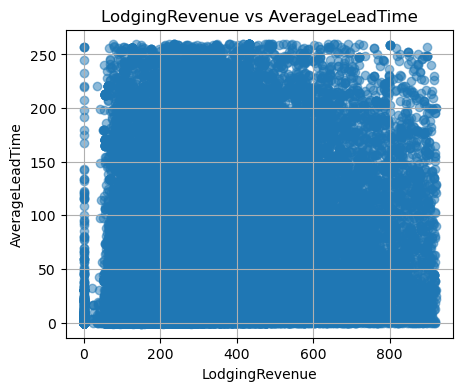

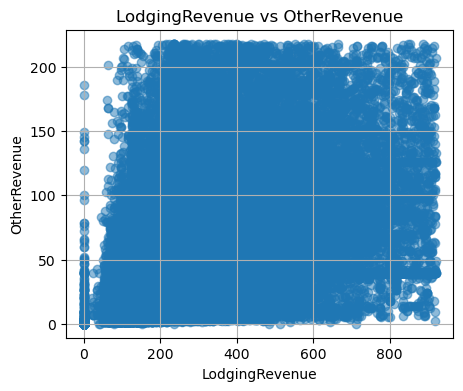

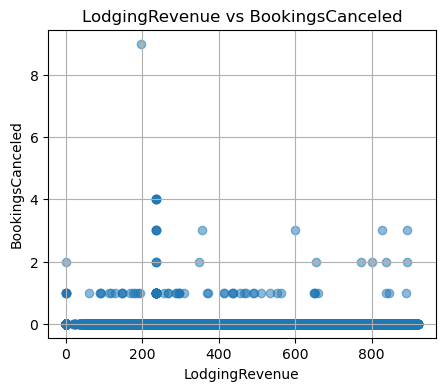

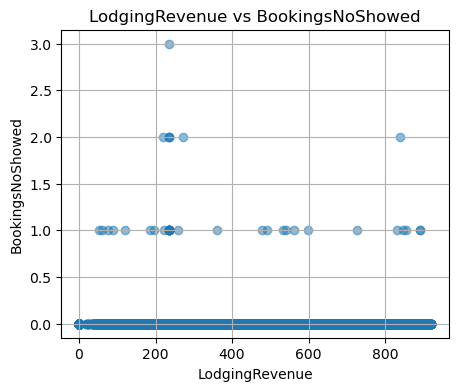

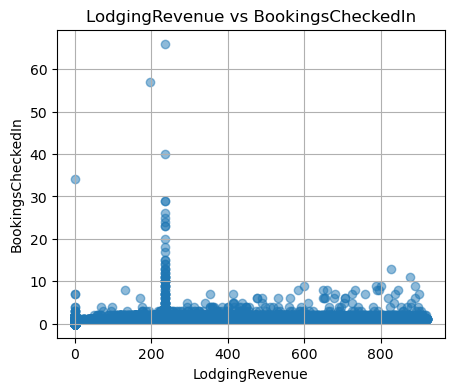

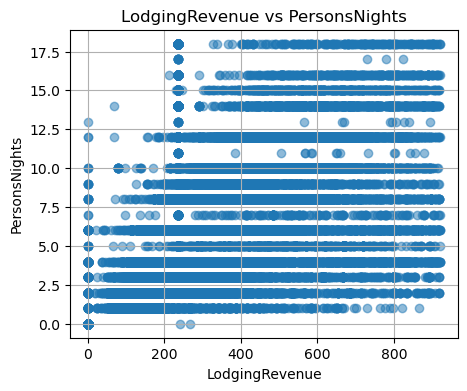

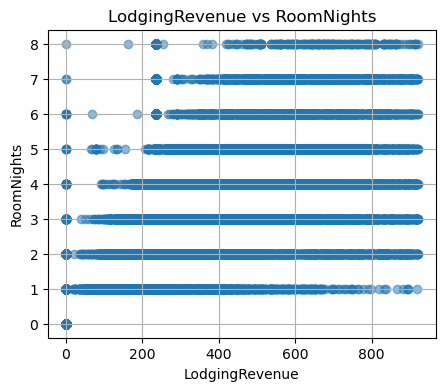

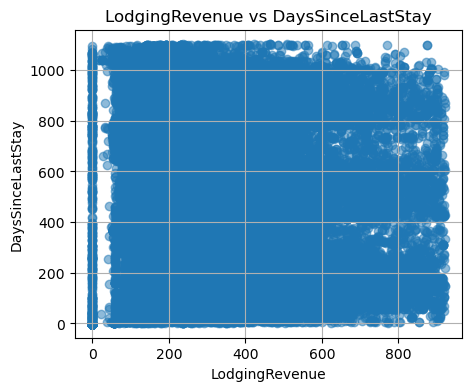

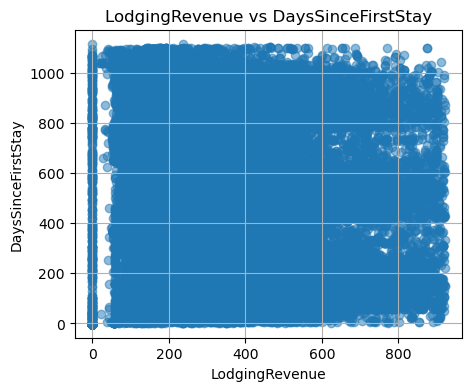

In [31]:
columns_to_compare = ['Age', 'DaysSinceCreation', 'AverageLeadTime',
                      'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
                      'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
                      'DaysSinceLastStay', 'DaysSinceFirstStay']


for column in columns_to_compare:
    plt.figure(figsize=(5, 4))
    plt.scatter(df['LodgingRevenue'], df[column], alpha=0.5)
    plt.title(f'LodgingRevenue vs {column}')
    plt.xlabel('LodgingRevenue')
    plt.ylabel(column)

    plt.grid(True)
    plt.show()